In [4]:
import numpy as np
import pandas as pd
import sqlite3



In [16]:
conn = sqlite3.connect('seasons.db')
df = pd.read_sql(sql = 'select * from season', con = conn)
columns = ["home_team","away_team","fthg","ftag","nmseason"]
df = df[columns]

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2817 entries, 0 to 2816
Data columns (total 5 columns):
home_team    2817 non-null object
away_team    2817 non-null object
fthg         2817 non-null int64
ftag         2817 non-null int64
nmseason     2817 non-null int64
dtypes: int64(3), object(2)
memory usage: 110.1+ KB


In [71]:
teams = df["home_team"].unique()

In [64]:
# Make dictionary Team:Rating
# Rating is Goals For - Goals Against
dict = {}
for team in teams:
    goals_for = df[df["home_team"]==team]["fthg"].sum() + df[df["away_team"]==team]["ftag"].sum()
    goals_against = df[df["home_team"]==team]["ftag"].sum() + df[df["away_team"]==team]["fthg"].sum()
    number_of_games = len(df[(df["home_team"]== team) | (df["away_team"]==team)])
    dict[team] = (goals_for - goals_against) / number_of_games
    

In [40]:
df[df["home_team"]=="Bayern Munich"]["fthg"].head()

0     3
28    4
45    2
63    6
82    3
Name: fthg, dtype: int64

In [62]:
len(df[(df["home_team"]=="Hoffenheim") | (df["away_team"]=="Hoffenheim")])

313

In [53]:
df[df["home_team"]=="Hoffenheim"].count()

home_team    157
away_team    157
fthg         157
ftag         157
nmseason     157
dtype: int64

In [54]:
df[df["away_team"]=="Hoffenheim"].count()

home_team    156
away_team    156
fthg         156
ftag         156
nmseason     156
dtype: int64

In [55]:
156+ 157

313

In [65]:
dict

{'Augsburg': -0.2559241706161137,
 'Bayern Munich': 1.6549520766773163,
 'Bielefeld': -0.7941176470588235,
 'Bochum': -0.6911764705882353,
 'Braunschweig': -0.9117647058823529,
 'Cottbus': -0.7941176470588235,
 'Darmstadt': -0.7352941176470589,
 'Dortmund': 1.0223642172523961,
 'Ein Frankfurt': -0.32616487455197135,
 'FC Koln': -0.363265306122449,
 'Fortuna Dusseldorf': -0.5294117647058824,
 'Freiburg': -0.39591836734693875,
 'Greuther Furth': -1.0,
 'Hamburg': -0.35782747603833864,
 'Hannover': -0.36917562724014336,
 'Hertha': -0.2816326530612245,
 'Hoffenheim': -0.006389776357827476,
 'Ingolstadt': -0.4411764705882353,
 'Kaiserslautern': -0.4852941176470588,
 'Karlsruhe': -0.7058823529411765,
 'Leverkusen': 0.49201277955271566,
 "M'gladbach": 0.05750798722044728,
 'Mainz': -0.05017921146953405,
 'Nurnberg': -0.4470588235294118,
 'Paderborn': -1.0,
 'RB Leipzig': 0.7560975609756098,
 'Schalke 04': 0.3003194888178914,
 'St Pauli': -0.9705882352941176,
 'Stuttgart': -0.1111111111111111,

In [169]:
df[(df['away_team']=="Bayern Munich") & (df['nmseason']==17)]

,home_team,away_team,fthg,ftag,nmseason
15,Werder Bremen,Bayern Munich,0,2,17
21,Hoffenheim,Bayern Munich,2,0,17
38,Schalke 04,Bayern Munich,0,3,17
62,Hertha,Bayern Munich,2,2,17


In [68]:
rating_df =  pd.DataFrame()

In [69]:
# make tableau avec des dates (seasons sur y) et noms des equipes sur x

"""
    Equipe1 Equipe2 Equipe2
15
14
13
12
11
10
9
8
7
"""

'\n    Equipe1 Equipe2 Equipe2\n15\n14\n13\n12\n11\n10\n9\n8\n7\n'

In [73]:
# teams = df["home_team"].unique() - liste de tous les equipes
seasons_tableau = df["nmseason"].unique()

In [74]:
seasons_tableau

array([17, 16, 15, 14, 13, 12, 11, 10,  9,  8])

In [222]:
dict_res = {}
for team in teams:
    arr = []
    for s in seasons_tableau:
        goals_for = df[(df["home_team"]==team) & (df["nmseason"]==s)]["fthg"].sum() + df[(df["away_team"]==team) & (df["nmseason"]==s)]["ftag"].sum()
        goals_against = df[(df["home_team"]==team) & (df["nmseason"]==s)]["ftag"].sum() + df[(df["away_team"]==team) & (df["nmseason"]==s)]["fthg"].sum()
        number_of_games = len(df[((df["home_team"]== team) | (df["away_team"]==team)) & (df["nmseason"]==s)])
        if number_of_games != 0:
            rate = (goals_for - goals_against) / number_of_games
        else:
            rate = 0
        arr.append(rate)
    dict_res[team] = arr
# a | b & c

In [223]:
dict_res

{'Augsburg': [0.42857142857142855,
  -0.47058823529411764,
  -0.29411764705882354,
  0.0,
  0.0,
  -0.5294117647058824,
  -0.38235294117647056,
  0,
  0,
  0],
 'Bayern Munich': [1.2857142857142858,
  1.9705882352941178,
  1.8529411764705883,
  1.8235294117647058,
  2.088235294117647,
  2.3529411764705883,
  1.6176470588235294,
  1.2058823529411764,
  1.2058823529411764,
  0.8529411764705882],
 'Bielefeld': [0, 0, 0, 0, 0, 0, 0, 0, 0, -0.7941176470588235],
 'Bochum': [0, 0, 0, 0, 0, 0, 0, 0, -0.9117647058823529, -0.47058823529411764],
 'Braunschweig': [0, 0, 0, 0, -0.9117647058823529, 0, 0, 0, 0, 0],
 'Cottbus': [0, 0, 0, 0, 0, 0, 0, 0, 0, -0.7941176470588235],
 'Darmstadt': [0,
  -1.0294117647058822,
  -0.4411764705882353,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'Dortmund': [2.7142857142857144,
  0.9411764705882353,
  1.411764705882353,
  0.14705882352941177,
  1.2352941176470589,
  1.1470588235294117,
  1.6176470588235294,
  1.3235294117647058,
  0.35294117647058826,
  0.676470588235294

In [224]:
df2 = pd.DataFrame(dict_res, index=seasons_tableau, columns=teams)

In [225]:
df2

,Bayern Munich,Hamburg,Hertha,Hoffenheim,Mainz,Schalke 04,Wolfsburg,Freiburg,M'gladbach,FC Koln,...,Braunschweig,Nurnberg,Greuther Furth,Fortuna Dusseldorf,Kaiserslautern,St Pauli,Bochum,Bielefeld,Cottbus,Karlsruhe
17,1.285714,-1.000000,0.000000,0.714286,-0.571429,-0.142857,-0.428571,-0.857143,-0.285714,-1.857143,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16,1.970588,-0.823529,-0.117647,0.794118,-0.323529,0.147059,-0.529412,-0.529412,-0.117647,0.264706,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15,1.852941,-0.176471,0.000000,-0.441176,0.117647,0.058824,-0.058824,0.000000,0.500000,-0.117647,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14,1.823529,-0.735294,-0.470588,-0.176471,-0.058824,0.058824,1.000000,-0.323529,0.794118,-0.176471,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13,2.088235,-0.705882,-0.235294,0.058824,-0.058824,0.588235,0.382353,-0.529412,0.470588,0.000000,...,-0.911765,-0.970588,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12,2.352941,-0.323529,0.000000,-0.735294,-0.058824,0.235294,-0.147059,0.147059,-0.117647,0.000000,...,0.000000,-0.235294,-1.0,-0.529412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11,1.617647,-0.647059,-0.764706,-0.176471,-0.117647,0.882353,-0.382353,-0.470588,0.735294,-1.058824,...,0.000000,-0.323529,0.0,0.000000,-0.882353,0.000000,0.000000,0.000000,0.000000,0.000000
10,1.205882,-0.176471,0.000000,0.000000,0.382353,-0.176471,-0.147059,-0.264706,-0.500000,-0.441176,...,0.000000,0.058824,0.0,0.000000,-0.088235,-0.970588,0.000000,0.000000,0.000000,0.000000
9,1.205882,0.441176,-0.647059,0.058824,-0.176471,0.647059,0.176471,-0.705882,-0.500000,-0.264706,...,0.000000,-0.764706,0.0,0.000000,0.000000,0.000000,-0.911765,0.000000,0.000000,0.000000
8,0.852941,0.058824,0.205882,0.411765,0.000000,0.352941,1.147059,0.000000,-0.676471,-0.441176,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-0.470588,-0.794118,-0.794118,-0.705882


In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 17 to 8
Data columns (total 31 columns):
Bayern Munich         10 non-null float64
Hamburg               10 non-null float64
Hertha                10 non-null float64
Hoffenheim            10 non-null float64
Mainz                 10 non-null float64
Schalke 04            10 non-null float64
Wolfsburg             10 non-null float64
Freiburg              10 non-null float64
M'gladbach            10 non-null float64
FC Koln               10 non-null float64
Augsburg              10 non-null float64
Dortmund              10 non-null float64
Ein Frankfurt         10 non-null float64
Leverkusen            10 non-null float64
Stuttgart             10 non-null float64
Werder Bremen         10 non-null float64
Hannover              10 non-null float64
RB Leipzig            10 non-null float64
Darmstadt             10 non-null float64
Ingolstadt            10 non-null float64
Paderborn             10 non-null float64
Braunschweig   

In [114]:
df.head()

,home_team,away_team,fthg,ftag,nmseason
0,Bayern Munich,Leverkusen,3,1,17
1,Hamburg,Augsburg,1,0,17
2,Hertha,Stuttgart,2,0,17
3,Hoffenheim,Werder Bremen,1,0,17
4,Mainz,Hannover,0,1,17


In [118]:
#df[df["home_team"]=="Bayern Munich"].groupby('home_team')["fthg"].mean() 

home_team
Bayern Munich    2.858974
Name: fthg, dtype: float64

In [226]:
df.groupby("home_team")["fthg"].agg(['count','mean','max','min'])

,count,mean,max,min
home_team,,,,
Augsburg,106,1.330189,4,0
Bayern Munich,156,2.858974,9,0
Bielefeld,17,0.941176,2,0
Bochum,34,1.205882,3,0
Braunschweig,17,1.058824,4,0
Cottbus,17,1.117647,3,0
Darmstadt,34,0.970588,3,0
Dortmund,156,2.256410,6,0
Ein Frankfurt,139,1.460432,6,0


In [124]:
%matplotlib inline

In [227]:
df.head()

,home_team,away_team,fthg,ftag,nmseason
0,Bayern Munich,Leverkusen,3,1,17
1,Hamburg,Augsburg,1,0,17
2,Hertha,Stuttgart,2,0,17
3,Hoffenheim,Werder Bremen,1,0,17
4,Mainz,Hannover,0,1,17


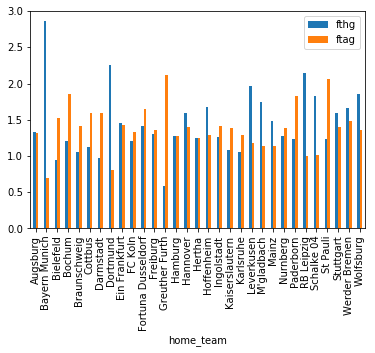

In [228]:

df.drop('nmseason', axis=1).groupby("home_team").mean().plot(kind="bar")

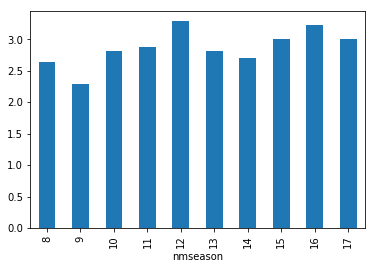

In [229]:
df[df["home_team"]=="Bayern Munich"].groupby('nmseason')["fthg"].mean().plot(kind="bar")

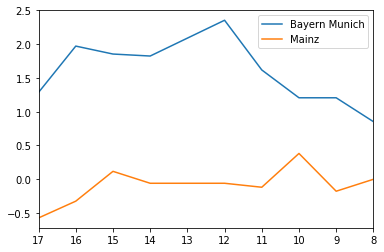

In [230]:
teams_selected = ["Bayern Munich", "Mainz"]
df2[teams_selected].plot()

In [231]:
df2[teams_selected]

,Bayern Munich,Mainz
17,1.285714,-0.571429
16,1.970588,-0.323529
15,1.852941,0.117647
14,1.823529,-0.058824
13,2.088235,-0.058824
12,2.352941,-0.058824
11,1.617647,-0.117647
10,1.205882,0.382353
9,1.205882,-0.176471
8,0.852941,0.000000


In [252]:
df[(df['home_team']=="Bayern Munich") ]

dict_res1 = {}
arr = []
for s in seasons_tableau:
    goals_for = df[(df["home_team"]=="Bayern Munich") & (df["nmseason"]==s)]["fthg"].sum()
    goals_against = df[(df["home_team"]=="Bayern Munich") & (df["nmseason"]==s)]["ftag"].sum()
    number_of_games = len(df[(df["home_team"]== "Bayern Munich") & (df["nmseason"]==s)])
    if number_of_games != 0:
        rate = (goals_for - goals_against) / number_of_games
    else:
        rate = 0
    arr.append(rate)
    dict_res1["Bayern Munich"] = arr

In [254]:
dict_res1

{'Bayern Munich': [2.0,
  2.7058823529411766,
  2.5294117647058822,
  2.2941176470588234,
  1.9411764705882353,
  2.6470588235294117,
  2.5294117647058822,
  2.0588235294117645,
  1.5294117647058822,
  1.2941176470588236],
 'Mainz': [-1.6666666666666667,
  -0.8823529411764706,
  -0.058823529411764705,
  -0.5882352941176471,
  -0.7647058823529411,
  -0.29411764705882354,
  -0.29411764705882354,
  0.4117647058823529,
  -0.8235294117647058,
  0]}

In [253]:
arr = []
for s in seasons_tableau:
    goals_for = df[(df["away_team"]=="Mainz") & (df["nmseason"]==s)]["ftag"].sum()
    goals_against = df[(df["away_team"]=="Mainz") & (df["nmseason"]==s)]["fthg"].sum()
    number_of_games = len(df[(df["away_team"]== "Mainz") & (df["nmseason"]==s)])
    if number_of_games != 0:
        rate = (goals_for - goals_against) / number_of_games
    else:
        rate = 0
    arr.append(rate)
    dict_res1["Mainz"] = arr

In [267]:
df3 = pd.DataFrame(dict_res1, index=seasons_tableau, columns=our_teams)

In [263]:
our_teams = ["Bayern Munich","Mainz"]

In [264]:
our_teams

['Bayern Munich', 'Mainz']

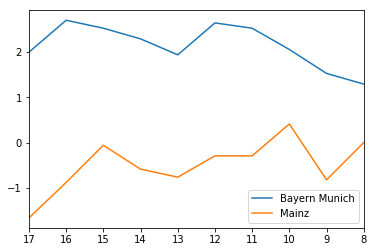

In [268]:
df3.plot()

In [271]:
df[(df["away_team"] == 'Schalke 04') & (df["nmseason"] == 11)]

,home_team,away_team,fthg,ftag,nmseason
1598,Stuttgart,Schalke 04,3,0,11
1619,Mainz,Schalke 04,2,4,11
1637,Wolfsburg,Schalke 04,2,1,11
1663,Hamburg,Schalke 04,1,2,11
1682,Leverkusen,Schalke 04,0,1,11
1700,Hannover,Schalke 04,2,2,11
1711,Dortmund,Schalke 04,2,0,11
1727,Hertha,Schalke 04,1,2,11
1759,FC Koln,Schalke 04,1,4,11
1777,M'gladbach,Schalke 04,3,0,11
